In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets list

In [5]:
! kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors


In [ ]:
! unzip utkface-new.zip -d train

In [7]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [8]:
images = []
ages = []

for img_name in os.listdir("/content/train/UTKFace"):
    age = img_name.split("_")[0]
    ages.append(int(age))

    image = cv.imread("/content/train/UTKFace/" + img_name)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = cv.resize(image,(128,128))
    images.append(image)


58


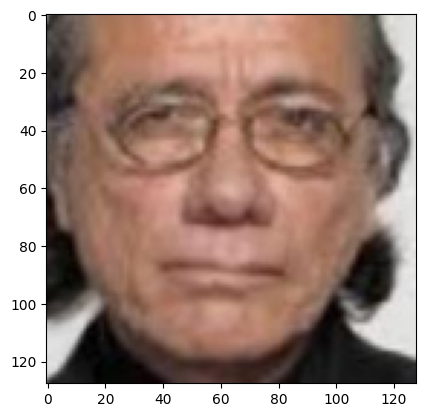

In [11]:
print(ages[2])
plt.imshow(images[2])
plt.show()

In [12]:
images = pd.Series(images,name="Images")
ages = pd.Series(ages, name="Ages")

df = pd.concat([images,ages],axis=1)
df.head()

,Images,Ages
0,"[[[26, 31, 27], [27, 32, 28], [30, 33, 30], [3...",21
1,"[[[188, 209, 210], [190, 211, 212], [192, 212,...",24
2,"[[[142, 141, 137], [80, 76, 73], [57, 53, 50],...",58
3,"[[[140, 133, 114], [97, 90, 72], [52, 44, 30],...",55
4,"[[[13, 17, 16], [13, 17, 16], [12, 16, 15], [1...",24


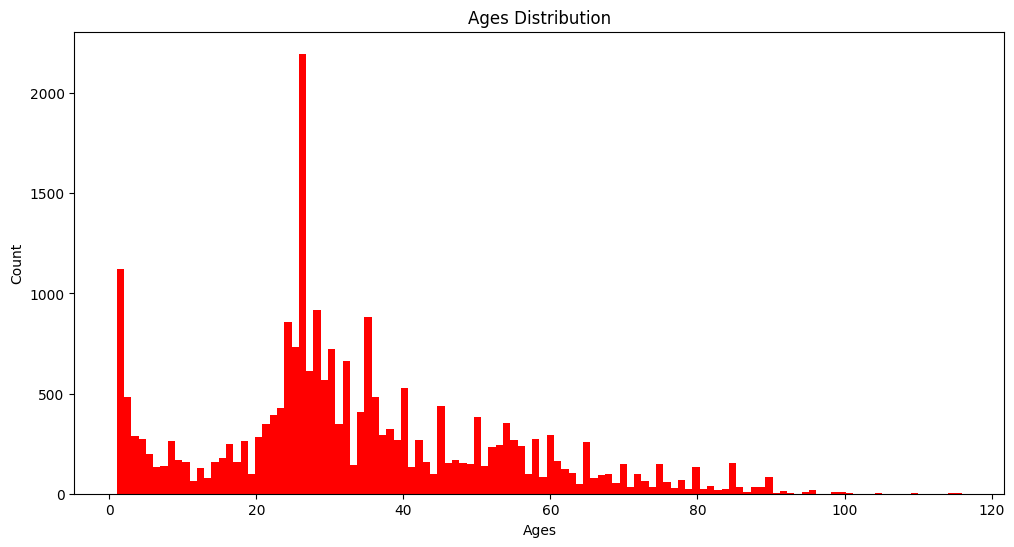

In [13]:
plt.figure(figsize=(12,6))
plt.hist(df["Ages"],bins=df["Ages"].max(),color="red")
plt.title("Ages Distribution")
plt.xlabel("Ages")
plt.ylabel("Count")
plt.show()

In [14]:
df = df[df["Ages"] <= 90]

ages_1 = df[df["Ages"] == 1].sample(frac=0.5, random_state=42)
ages_26 = df[df["Ages"] == 26].sample(frac=0.5, random_state=42)

df = df[(df["Ages"] != 1) & (df["Ages"] != 26)]

df = pd.concat([df, ages_1, ages_26], ignore_index=True)

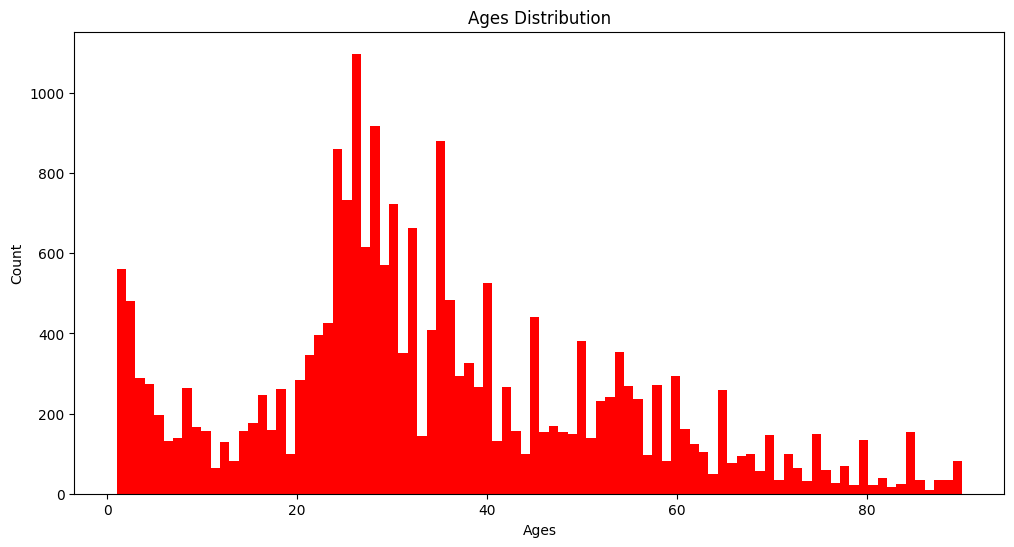

In [15]:
plt.figure(figsize=(12,6))
plt.hist(df["Ages"],bins=df["Ages"].max(),color="red")
plt.title("Ages Distribution")
plt.xlabel("Ages")
plt.ylabel("Count")
plt.show()

In [16]:
X = np.array(df["Images"].values.tolist())
Y = np.array(df["Ages"].values.tolist())

In [17]:
print(X.shape)
print(Y.shape)

(21961, 128, 128, 3)
(21961,)


In [18]:
X_train , X_validation , Y_train , Y_validation = train_test_split(X,Y,test_size=0.2)

In [19]:
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(17568, 128, 128, 3)
(4393, 128, 128, 3)
(17568,)
(4393,)


In [20]:
del images
del df
del ages

In [21]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.0,
    horizontal_flip=True
)

dataset_train = image_data_generator.flow(
    X_train,
    Y_train,
    batch_size=16
)

dataset_validation = image_data_generator.flow(
    X_validation,
    Y_validation,
    batch_size=16
)

In [22]:
del X_train
del X_validation
del Y_train
del Y_validation

In [23]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(128,128,3),
    pooling="avg",
    weights="imagenet"
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# manage layers

In [24]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation="relu")
])

In [25]:
model.compile(loss="mae",optimizer="adam")

In [26]:
history = model.fit(dataset_train,validation_data=dataset_validation,epochs=12)

Epoch 1/12


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 163s 91ms/step - loss: 11.9439 - val_loss: 9.1277
Epoch 2/12
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 100s 91ms/step - loss: 8.4725 - val_loss: 13.7783
Epoch 3/12
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 96s 87ms/step - loss: 7.7453 - val_loss: 7.3966
Epoch 4/12
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 96s 87ms/step - loss: 7.4860 - val_loss: 7.8171
Epoch 5/12
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 96s 87ms/step - loss: 7.2447 - val_loss: 7.7093
Epoch 6/12
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 96s 88ms/step - loss: 6.9397 - val_loss: 8.2013
Epoch 7/12
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 96s 88ms/step - loss: 6.6952 - val_loss: 6.8094
Epoch 8/12
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 96s 88ms/step - loss: 6.5060 - val_loss: 7.8101
Epoch 9/12
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 96s 87ms/step - loss: 6.3416 - val_loss: 7.5959
Epoch 10/12
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 96s 87ms/step - loss: 6.3340 - val_loss: 9.9993
Epoch 11/12
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 101s 92ms/step - loss: 6.2461 - val_loss: 7.9681
Epoch 12/12
10

In [27]:
model.evaluate(dataset_validation)

275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 7.7735


7.719342231750488

In [ ]:
model.save("Age_prediction_model.h5")

In [ ]:

face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')


image = cv.imread('image.jpg')


gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)


faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    face = image[y:y+h, x:x+w]
    aligned_face = cv.resize(face, (256, 256))

   
for (x, y, w, h) in faces:
    cv.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)




In [45]:
image = image
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = cv.resize(image,(128,128))
image = image / 255.0
test = np.array(image).reshape(-1,128,128,3)
output = model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


[25.431341]


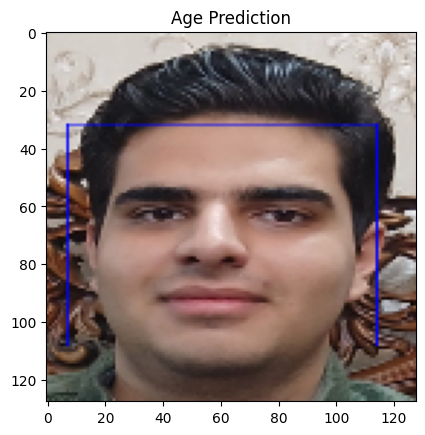

In [46]:
print(output[0])
plt.title("Age Prediction")
plt.imshow(image)
plt.show()